# First implementation of Machine Learning Algorithm

In this file, we are going to import data from a file .csv that we take from chornograf.
We have to parse him and put into an array.
Finally we will insert some machin Learning algorithm with the librairy sklearn.

To do this, we will use some librairy as pandas, matplotlib, numpy, sklearn and some others.


In [1]:
from sklearn import linear_model
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Dans le fichier DataDemeterAll.csv

Toutes les données de puis 1970h à partir 7 mars au 28 mai

SELECT mean("temperature") AS "mean_temperature", mean("moisture-percent") AS "mean_moisture-percent" 

FROM "demeter"."autogen"."chirp-left" 

WHERE time > now() -1970h 

GROUP BY time(30m) FILL(null)

# Import des données 

Leccture d'un fichier csv en un fichier dataframe.

Création d'une base dataframe avec comme colonne le temps, l'humidité, la tempérture, l'humidité + 1, la température + 1.

Il faut régler le problème tu dernier temps.

In [2]:
from traitement import Traitement


df = pd.read_csv('DataDemeterAll.csv')

t= Traitement()

#Création des deux autres colonnes
df = t.ajoutData(df)

## Ajout de l'arrosage

L'arrosage est ajouté au temps 10h30 ou 11h30.

In [3]:
import datetime

df = t.arrosageHist(df,1)
df['index'] = df.index
nligne = df.shape[0]
position = df.shape[1]-1
for i in range(nligne):
    df.iloc[i,position] = (i-6)//48 + 1


# Delete NaN Value

In [4]:
i = 6

df = t.eliminateNaNValue(df,i)
#Delete the data that are not inside a loop of one day
df.drop(df.index[range(0,i+48*3)],axis = 0,inplace = True)
nligne = df.shape[0]
print("nombre de ligne", nligne)


nombre de ligne 3647


In [5]:
nligne = df.shape[0]
nColumn = df.shape[1]
print(df.isnull().sum())
for i in range(nligne):
    if df.iloc[i,:].isnull().values.any():
        print(df.index[i])
        

date                     0
mean_moisture-percent    0
mean_temperature         0
moistureAdd              0
temperatureAdd           0
Arrosage                 0
TAfterArrosage           0
ArrosageHist             0
index                    0
dtype: int64


# Data Test

Extraction des données aléatoire sur toutes les datasets. 7 jours entiers sont pris pour les tests.
Les données pour les Tests sont exclus des données pour le training

In [6]:
import random
jour = nligne //48
print("nb de jour de test : ",jour)
incr = 0
jourTest = random.sample(range(1,jour),k=14)
jourTest.sort()
print("jour de test : ",jourTest)


nb de jour de test :  75
jour de test :  [8, 13, 14, 18, 19, 32, 42, 46, 51, 53, 54, 57, 58, 65]


In [7]:
indTest = []
for el in jourTest:
    indTest = np.append(indTest,range(int(48*(el-1)),int(48*el)))
indTest = indTest.astype(int)
dataTest = df.iloc[indTest,:].copy()
df.drop(df.index[indTest],axis = 0,inplace = True)


In [128]:
df

,date,mean_moisture-percent,mean_temperature,moistureAdd,temperatureAdd,Arrosage,TAfterArrosage,ArrosageHist,index
150,3/10/2019 10:30:00.000000000 AM,31.476667,24.918333,5.533333,0.161667,10,0,10,4
151,3/10/2019 11:00:00.000000000 AM,37.010000,25.080000,-1.550000,0.186667,0,30,10,4
152,3/10/2019 11:30:00.000000000 AM,35.460000,25.266667,-0.663333,0.968333,0,60,10,4
153,3/10/2019 12:00:00.000000000 PM,34.796667,26.235000,-0.223333,-0.628333,0,90,10,4
154,3/10/2019 12:30:00.000000000 PM,34.573333,25.606667,-0.250000,-0.285000,0,120,10,4
155,3/10/2019 1:00:00.000000000 PM,34.323333,25.321667,-0.440000,0.306667,0,150,10,4
156,3/10/2019 1:30:00.000000000 PM,33.883333,25.628333,-0.423333,1.411667,0,180,10,4
157,3/10/2019 2:00:00.000000000 PM,33.460000,27.040000,-0.591667,1.400000,0,210,10,4
158,3/10/2019 2:30:00.000000000 PM,32.868333,28.440000,0.240000,-2.390000,0,240,10,4
159,3/10/2019 3:00:00.000000000 PM,33.108333,26.050000,-0.063333,-0.558333,0,270,10,4


# Analyse de la dataFrame


## Linear Regression Multiple Variables sans l'information sur le temps sans arrosage



In [9]:
reg = linear_model.LinearRegression()
reg.fit(df[['mean_moisture-percent','mean_temperature','Arrosage']],df.moistureAdd)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
reg.coef_

array([-0.0275262 , -0.01919589,  0.22310259])

In [11]:
reg.intercept_

0.96002886311040936

In [12]:
reg.predict([[31,25,10]])[0]

1.8578454743564348

## Linear Regression Multiple Variables AVEC l'information sur le temps sans arrosage

In [13]:
reg2 = linear_model.LinearRegression()
reg2.fit(df[['mean_moisture-percent','mean_temperature','Arrosage','TAfterArrosage']],df.moistureAdd)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
reg2.coef_

array([ -2.48829965e-02,  -7.61980160e-03,   2.27214298e-01,
         1.48999237e-04])

In [15]:
reg2.intercept_

0.48590524214363745

In [16]:
reg2.predict([[31,25,10,0]])[0]

1.7961802894778696



# Test avec data Test

On fait nos tests avec notre dataTest créé ci-dessus

## Test avec les donnes SANS le temps

In [17]:
init = 0+48*0
dataTest['resultSansT'] = dataTest.index
position = dataTest.shape[1]-1

StartHumidity = dataTest.iloc[init,1]
TestSize = dataTest.shape[0]
result = np.zeros(TestSize)
for i in range(0,TestSize):
    dataTest.iloc[int(i+init),position] = StartHumidity

    if i%48 == 0:
        StartHumidity = dataTest.iloc[init+i,1]
    result[i] = StartHumidity + reg.predict([[StartHumidity,dataTest.iloc[init+i,2],dataTest.iloc[init+i,5]]])[0]
    StartHumidity = result[i]
    

#print(dfTest.iloc[range(0+init+1,TestSize+init+1),1])
ErrSansTemps = np.mean(dataTest.iloc[:,1].values-dataTest.iloc[:,position].values)
ErrSansTempsAbs = np.mean(np.absolute(dataTest.iloc[:,1].values-dataTest.iloc[:,position].values))

print("Moyenne d'erreur : ",ErrSansTemps)
print("Moyenne d'erreur absolue : ",ErrSansTempsAbs)


Moyenne d'erreur :  -0.72907607234
Moyenne d'erreur absolue :  1.72805282656


## Test avec les donnes AVEC le temps

In [18]:
init = 0+48*0
dataTest['resultAvecT'] = dataTest.index
position = dataTest.shape[1]-1

StartHumidity = dataTest.iloc[init,1]

TestSize = dataTest.shape[0]
result2 = np.zeros(TestSize)
for i in range(0,TestSize):
    dataTest.iloc[int(i+init),position] = StartHumidity

    if i%48 == 0:
        StartHumidity = dataTest.iloc[init+i,1]
    result2[i] = StartHumidity + reg2.predict([[StartHumidity,dataTest.iloc[init+i,2],dataTest.iloc[init+i,5],dataTest.iloc[init+i,6]]])[0]
    StartHumidity = result2[i]

#print(result2)
#print(dfTest.iloc[range(0+init+1,TestSize+init+1),1])
ErrTemps = np.mean(dataTest.iloc[:,1].values-dataTest.iloc[:,position].values)
ErrTempsAbs = np.mean(np.absolute(dataTest.iloc[:,1].values-dataTest.iloc[:,position].values))

print("Moyenne d'erreur : ",ErrTemps)
print("Moyenne d'erreur absolue : ",ErrTempsAbs)


Moyenne d'erreur :  -0.237446447338
Moyenne d'erreur absolue :  1.61026013894


# Partage de la Data frame

Partage de la data frame en deux. 

Une partie qui contient que les moments où on arrose. On peut selectionner ceci grace à loc et à df['TAfterArrosage'] == 0. Quand on arrose, le temps après arrosage est de 0.

L'autre partie contient les moments où on n'arrose pas. C'est-à-dire les momments où l'eau s'évapore.

In [124]:
limite = 270
dfArrosage = df.loc[df['TAfterArrosage'] == 0]
tmp = df.loc[df['TAfterArrosage'] > 0]
dfStabilisation = df.loc[df['TAfterArrosage'] > limite].copy()
dfEvaporation = tmp.loc[df['TAfterArrosage'] <= limite].copy()

In [125]:
regLinearAro = linear_model.LinearRegression()
regLinearAro.fit(dfArrosage[['mean_moisture-percent','Arrosage','index']],dfArrosage.moistureAdd)
regLinearAro.intercept_
regLinearAro.coef_

array([ 0.00441217,  0.14478363, -0.09671637])

In [126]:
# Pour faire le régression linear sur le moment d'arrosage
regLinearEva = linear_model.LinearRegression()
regLinearEva.fit(dfEvaporation[['mean_moisture-percent','mean_temperature','TAfterArrosage','ArrosageHist','index']],dfEvaporation.moistureAdd)
regLinearEva.intercept_
regLinearEva.coef_

array([-0.0138635 , -0.03098848,  0.00688307, -0.0071598 ,  0.00657351])

In [127]:
# Pour faire le régression linear sur le moment d'arrosage
regLinearSta = linear_model.LinearRegression()
regLinearSta.fit(dfStabilisation[['mean_moisture-percent','mean_temperature','TAfterArrosage','ArrosageHist','index']],dfStabilisation.moistureAdd)
regLinearSta.intercept_
regLinearSta.coef_

array([ -3.82657552e-03,   1.28949302e-02,   7.92834630e-07,
        -1.47368500e-03,   1.23629427e-03])

In [108]:
#Pour tester sur la base de données de training
init = 0
base = dataTest 

In [109]:
dataTest['resultSepare'] = dataTest.index
StartHumidity = base.iloc[init,1]
position = dataTest.shape[1]-1


TestSize = dataTest.shape[0]
ErrAro = 0
result = np.zeros(TestSize)
ErrEva = 0
nAro = 0

for i in range(0,TestSize-1):
    dataTest.iloc[int(i),position] = StartHumidity

    if i%48 == 0:
        nAro =+ 1
        StartHumidity = dataTest.iloc[i,1]
        result[i] = StartHumidity + regLinearAro.predict([[StartHumidity,base.iloc[init+i,5],base.iloc[init+i,8]]])[0]
        ErrAro =+ abs(result[i] - base.iloc[i+1,1])
    elif i%48 <= limite//30:
        result[i] = StartHumidity + regLinearEva.predict([[StartHumidity,base.iloc[init+i,2],base.iloc[init+i,6],base.iloc[init+i,7],base.iloc[init+i,8]]])[0]
        ErrEva =+ abs(result[i] - base.iloc[i+1,1])
    else:
        result[i] = StartHumidity + regLinearSta.predict([[StartHumidity,base.iloc[init+i,2],base.iloc[init+i,6],base.iloc[init+i,7],base.iloc[init+i,8]]])[0]
        ErrSta =+ abs(result[i] - base.iloc[i+1,1])

    StartHumidity = result[i]
dataTest.iloc[TestSize-1,position] = StartHumidity

ErrAro = ErrAro/nAro
ErrEva = ErrEva/(15*nAro)
ErrSta = ErrSta/((48-16*nAro))

print("Moyenne Erreur d'Arrosage : ", ErrAro)
print("Moyenne d'erreur evaporation : ", ErrEva)
print("Moyenne d'erreur stabilisation : ", ErrSta)

ErrSepare = np.mean(dataTest.iloc[:,1].values-dataTest.iloc[:,position].values)
ErrSepareAbs = np.mean(np.absolute(dataTest.iloc[:,1].values-dataTest.iloc[:,position].values))
print("Moyenne d'erreur : ",ErrSepare)
print("Moyenne d'erreur absolue : ",ErrSepareAbs)


Moyenne Erreur d'Arrosage :  0.0606126054534
Moyenne d'erreur evaporation :  0.0114313340483
Moyenne d'erreur stabilisation :  0.0212586743905
Moyenne d'erreur :  -0.0575398672782
Moyenne d'erreur absolue :  0.690294389607


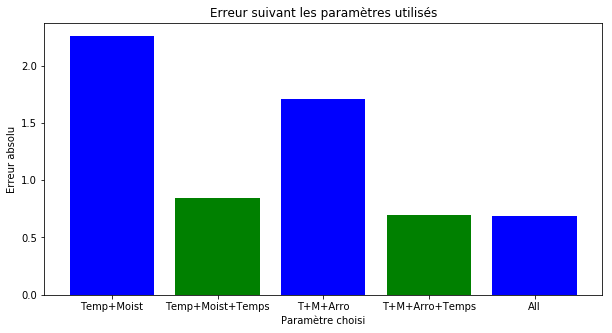

In [87]:
# x-coordinates of left sides of bars  
left = [1, 2, 3, 4, 5] 
  
# heights of bars 
height = [ErrSepareAbs5,ErrSepareAbs4, ErrSepareAbs3, ErrSepareAbs2,ErrSepareAbs1]
height = [abs(x) for x in height]

f, ax = plt.subplots(figsize=(10,5)) # set the size that you'd like (width, height)
# labels for bars 
tick_label = ['Temp+Moist', 'Temp+Moist+Temps', 'T+M+Arro','T+M+Arro+Temps','All'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['blue', 'green']) 

# naming the x-axis 
plt.xlabel('Paramètre choisi') 
# naming the y-axis 
plt.ylabel('Erreur absolu') 
# plot title 
plt.title('Erreur suivant les paramètres utilisés') 
  
# function to show the plot 
plt.show() 

# Affichage des résultats

On Affiche les resultats

In [111]:
print("Sans le temps : ", ErrSansTemps)
print("Sans le temps absolue : ", ErrSansTempsAbs)

print("\nAvec le temps : ", ErrTemps)
print("Avec le temps absolu : ", ErrTempsAbs)


#print("\nDurant Arrosage : ",ErrAro)
#print("Evaporation : " , ErrEva)
print("\nAvec Temps Séparé : ", ErrSepare)
print("Avec Temps Séparé absolu : ", ErrSepareAbs)


Sans le temps :  -0.72907607234
Sans le temps absolue :  1.72805282656

Avec le temps :  -0.237446447338
Avec le temps absolu :  1.61026013894

Avec Temps Séparé :  -0.0575398672782
Avec Temps Séparé absolu :  0.690294389607


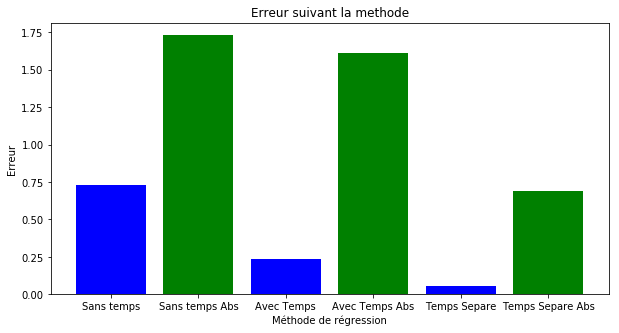

In [110]:
# x-coordinates of left sides of bars  
left = [1, 2, 3, 4, 5, 6] 
  
# heights of bars 
height = [ErrSansTemps,ErrSansTempsAbs, ErrTemps, ErrTempsAbs, ErrSepare,ErrSepareAbs]
height = [abs(x) for x in height]

  
# labels for bars 
tick_label = ['Sans temps', 'Sans temps Abs', 'Avec Temps','Avec Temps Abs', 'Temps Separe','Temps Separe Abs'] 
f, ax = plt.subplots(figsize=(10,5)) # set the size that you'd like (width, height)

# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['blue', 'green']) 

# naming the x-axis 
plt.xlabel('Méthode de régression') 
# naming the y-axis 
plt.ylabel('Erreur') 
# plot title 
plt.title('Erreur suivant la methode') 
  
# function to show the plot 
plt.show() 

# Graphic

Creation des graphics de la courbe d'évolution de la température



Text(0,0.5,'Watering quantity')

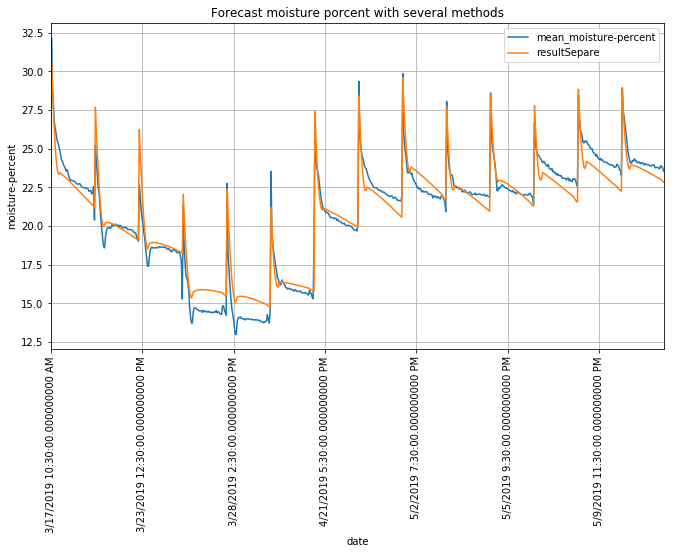

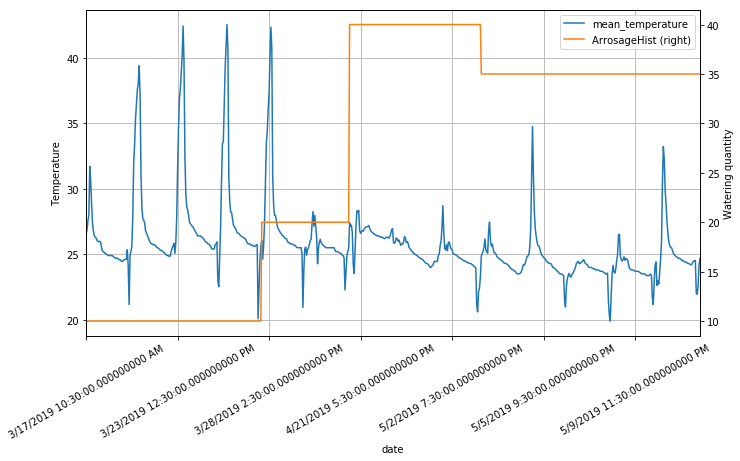

In [153]:
fig = plt.figure()
ax = dataTest.plot(x='date', y=['mean_moisture-percent','resultSepare',],figsize=(11, 6),rot=90,grid=True, title="Forecast moisture porcent with several methods")
ax.set_ylabel("moisture-percent")

ax = dataTest.plot(x='date', y=['mean_temperature','ArrosageHist'],secondary_y=['ArrosageHist'],figsize=(11, 6),rot=30,grid=True)

ax.set_ylabel("Temperature")
ax.right_ax.set_ylabel('Watering quantity')


#dfTest.loc[dfTest['TAfterArrosage'] == 30]

## recherche de la meilleures delimitation pour le partitionnement en 3



In [82]:
dfArrosage = df.loc[df['TAfterArrosage'] == 0]
tmp = df.loc[df['TAfterArrosage'] > 0]

bestLimite = 0
errmin = 1000
res = np.zeros(1200//30-1)
for limite in range(30,1200,30):
    
    dfStabilisation = df.loc[df['TAfterArrosage'] > limite].copy()
    dfEvaporation = tmp.loc[df['TAfterArrosage'] <= limite].copy()

    regLinearAro = linear_model.LinearRegression()
    regLinearAro.fit(dfArrosage[['mean_moisture-percent','Arrosage','index']],dfArrosage.moistureAdd)
    regLinearEva = linear_model.LinearRegression()
    regLinearEva.fit(dfEvaporation[['mean_moisture-percent','mean_temperature','TAfterArrosage','ArrosageHist','index']],dfEvaporation.moistureAdd)
    regLinearSta = linear_model.LinearRegression()
    regLinearSta.fit(dfStabilisation[['mean_moisture-percent','mean_temperature','TAfterArrosage','ArrosageHist','index']],dfStabilisation.moistureAdd)



    dataTest['resultSepare'] = dataTest.index
    StartHumidity = base.iloc[0,1]
    position = dataTest.shape[1]-1
    TestSize = dataTest.shape[0]
    result = np.zeros(TestSize)

    for i in range(0,TestSize-1):
        dataTest.iloc[int(i),position] = StartHumidity

        if i%48 == 0:
            StartHumidity = dataTest.iloc[i,1]
            result[i] = StartHumidity + regLinearAro.predict([[StartHumidity,base.iloc[i,5],base.iloc[i,8]]])[0]
        elif i%48 <= limite//30:
            result[i] = StartHumidity + regLinearEva.predict([[StartHumidity,base.iloc[i,2],base.iloc[i,6],base.iloc[i,7],base.iloc[i,8]]])[0]
        else:
            result[i] = StartHumidity + regLinearSta.predict([[StartHumidity,base.iloc[i,2],base.iloc[i,6],base.iloc[i,7],base.iloc[i,8]]])[0]

        StartHumidity = result[i]
    dataTest.iloc[TestSize-1,position] = StartHumidity


    ErrSepare = np.mean(dataTest.iloc[:,1].values-dataTest.iloc[:,position].values)
    ErrSepareAbs = np.mean(np.absolute(dataTest.iloc[:,1].values-dataTest.iloc[:,position].values))
    print("limite ", limite,"Moyenne d'erreur absolue : ",ErrSepareAbs)
    res[limite//30-1]=ErrSepareAbs
    if (ErrSepareAbs< errmin):
        bestLimite = limite
        errmin = ErrSepareAbs

print("BEST LIMITE : ",bestLimite)

limite  30 Moyenne d'erreur absolue :  1.00639112236
limite  60 Moyenne d'erreur absolue :  0.85312725651
limite  90 Moyenne d'erreur absolue :  0.745439478263
limite  120 Moyenne d'erreur absolue :  0.680048996767
limite  150 Moyenne d'erreur absolue :  0.658216289052
limite  180 Moyenne d'erreur absolue :  0.652418116589
limite  210 Moyenne d'erreur absolue :  0.661811874945
limite  240 Moyenne d'erreur absolue :  0.647235689688
limite  270 Moyenne d'erreur absolue :  0.690294389607
limite  300 Moyenne d'erreur absolue :  0.786472219598
limite  330 Moyenne d'erreur absolue :  0.791978164778
limite  360 Moyenne d'erreur absolue :  0.925651799006
limite  390 Moyenne d'erreur absolue :  1.10915422737
limite  420 Moyenne d'erreur absolue :  1.25608740377
limite  450 Moyenne d'erreur absolue :  1.36629642589
limite  480 Moyenne d'erreur absolue :  1.50004648956
limite  510 Moyenne d'erreur absolue :  1.5943057106
limite  540 Moyenne d'erreur absolue :  1.66389538076
limite  570 Moyenne d'

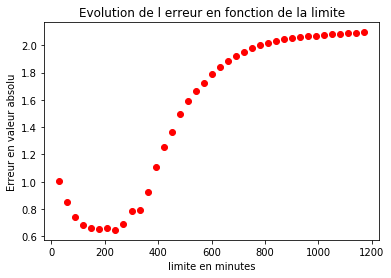

In [81]:
plt.plot(range(30,1200,30), res, 'ro')
#plt.axis([0, 6, 0, 20])
plt.xlabel('limite en minutes')
plt.ylabel('Erreur en valeur absolu')
plt.title('Evolution de l erreur en fonction de la limite')
plt.show()

Text(0,0.5,'moisture-percent')

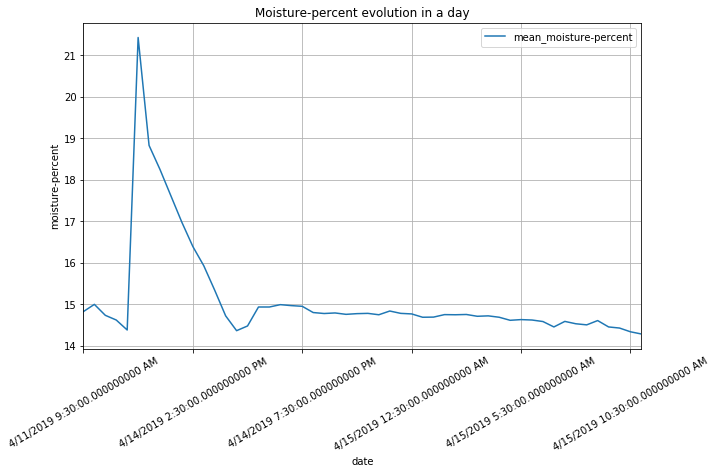

In [37]:
dfGraph = dataTest.iloc[range(44+48*4,96+48*4),:]
ax = dfGraph.plot(x='date', y=['mean_moisture-percent'],figsize=(10, 6),rot=30,grid=True, title="Moisture-percent evolution in a day")
ax.set_ylabel("moisture-percent")



# Erreur après 24heures

L'erreur ci-dessous représente l'erreur à la dernière itération.

In [134]:
dfEnd = dataTest.loc[dataTest['TAfterArrosage'] == 0]
EndSans = np.mean(dfEnd.iloc[:,8]-dfEnd.iloc[:,1])
EndAvec = np.mean(dfEnd.iloc[:,9]-dfEnd.iloc[:,1])
EndSepare = np.mean(dfEnd.iloc[:,10]-dfEnd.iloc[:,1])

print("Sans le temps : ", EndSans)
print("Avec le temps : ", EndAvec)
print("Avec Temps Séparé : ", EndSepare)


Sans le temps :  22.6970238095
Avec le temps :  -0.192043816914
Avec Temps Séparé :  -0.116894436181




## Essaie avec d'autre méthode

In [143]:
DataEnd = df.loc[df['TAfterArrosage'] == 0].copy()
nligneEnd = DataEnd.shape[0]
tmp = np.linspace(0,nligneEnd-2,nligneEnd-1,dtype=int)
DataEnd.iloc[tmp, 3] = pd.Series(np.append(DataEnd.iloc[tmp+1,1].to_numpy()-DataEnd.iloc[tmp,1].to_numpy(),0), index=DataEnd.index)

#Ajout de la ligne
df.iloc[nligneEnd-1, 3] = 0
regtest = linear_model.LinearRegression()
regtest.fit(DataEnd[['mean_moisture-percent','mean_temperature','Arrosage','index']],DataEnd.moistureAdd)

regtest.intercept_
regtest.coef_


array([-0.09003624, -0.03782115,  0.05054718,  0.00371843])

In [144]:
dfPure = df.loc[df['TAfterArrosage'] <= 30 ]